In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
!ls ../data

2007-2016-Homelessnewss-USA.csv         README.md
2007-2016-Homelessnewss-USA.csv (1).zip homeless_people_by_state.csv
City_time_series.csv                    realtor-data.csv
City_time_series.csv.zip                usa-real-estate-dataset.zip


# Combine datasets

Here, we combine the number of homeless people in each state with the average price of each property sold in each state for year 2008 and 2016. Then we perform EDA analysis on the predictors. 

In [3]:
homeless_df = pd.read_csv("../data/2007-2016-Homelessnewss-USA.csv")
homeless_df

,Year,State,CoC Number,CoC Name,Measures,Count
0,1/1/07,AK,AK-500,Anchorage CoC,Chronically Homeless Individuals,224
1,1/1/07,AK,AK-500,Anchorage CoC,Homeless Individuals,696
2,1/1/07,AK,AK-500,Anchorage CoC,Homeless People in Families,278
3,1/1/07,AK,AK-500,Anchorage CoC,Sheltered Chronically Homeless Individuals,187
4,1/1/07,AK,AK-500,Anchorage CoC,Sheltered Homeless,842
...,...,...,...,...,...,...
86524,1/1/16,WY,WY-500,Wyoming Statewide CoC,Unsheltered Homeless Unaccompanied Youth (Unde...,7
86525,1/1/16,WY,WY-500,Wyoming Statewide CoC,Unsheltered Homeless Veterans,31
86526,1/1/16,WY,WY-500,Wyoming Statewide CoC,Unsheltered Parenting Youth (Under 25),3
86527,1/1/16,WY,WY-500,Wyoming Statewide CoC,Unsheltered Parenting Youth Age 18-24,3


In [6]:
# extract the year and add a new column to the dataframe
homeless_df['Year_only'] = pd.DatetimeIndex(homeless_df['Year']).year 

# subset the homeless data to only contain data from year 2008 and 2016
homeless_df_subset_08_16 = homeless_df[homeless_df['Year_only'].isin([2008, 2016])]
homeless_df_subset_08_16

,Year,State,CoC Number,CoC Name,Measures,Count,Year_only
4824,1/1/08,AK,AK-500,Anchorage CoC,Chronically Homeless Individuals,300,2008
4825,1/1/08,AK,AK-500,Anchorage CoC,Homeless Individuals,695,2008
4826,1/1/08,AK,AK-500,Anchorage CoC,Homeless People in Families,328,2008
4827,1/1/08,AK,AK-500,Anchorage CoC,Sheltered Chronically Homeless Individuals,239,2008
4828,1/1/08,AK,AK-500,Anchorage CoC,Sheltered Homeless,921,2008
...,...,...,...,...,...,...,...
86524,1/1/16,WY,WY-500,Wyoming Statewide CoC,Unsheltered Homeless Unaccompanied Youth (Unde...,7,2016
86525,1/1/16,WY,WY-500,Wyoming Statewide CoC,Unsheltered Homeless Veterans,31,2016
86526,1/1/16,WY,WY-500,Wyoming Statewide CoC,Unsheltered Parenting Youth (Under 25),3,2016
86527,1/1/16,WY,WY-500,Wyoming Statewide CoC,Unsheltered Parenting Youth Age 18-24,3,2016


In [7]:
homeless_df_subset_08_16.describe()

,Count,Year_only
count,21648.000000,21648.000000
mean,260.139320,2014.239468
std,1448.592168,3.314407
min,0.000000,2008.000000
25%,2.000000,2016.000000
50%,25.000000,2016.000000
75%,153.000000,2016.000000
max,73523.000000,2016.000000


Note: The homeless data acquired from the U.S. Department of Housing and Urban Development uses the Continuums of Care (CoC) number, which divides each state into different geographic area. However, it does not necessarily match with the known zip code or county boundaries, which makes it hard to join this data with other county level data. Therefore, we first explore the data at states level. 

In [9]:
# Convert the count to numeric
homeless_df_subset_08_16["Count"] = pd.to_numeric(homeless_df_subset_08_16["Count"])
homeless_df_subset_08_16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21648 entries, 4824 to 86528
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        21648 non-null  object
 1   State       21648 non-null  object
 2   CoC Number  21648 non-null  object
 3   CoC Name    21648 non-null  object
 4   Measures    21648 non-null  object
 5   Count       21648 non-null  int64 
 6   Year_only   21648 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.3+ MB


/var/folders/24/6z460d797_g0w77wl1mc7jqr0000gn/T/ipykernel_39913/1905487867.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homeless_df_subset_08_16["Count"] = pd.to_numeric(homeless_df_subset_08_16["Count"])


In [51]:
# first aggregate the data into state level
homeless_df_subset_08_16_for_join = homeless_df_subset_08_16.groupby(["Year_only","State"])["Count"].sum().reset_index()
homeless_df_subset_08_16_for_join.columns = ["Year_only", "state_abbrev", "homeless_count"]
# homeless_df_subset_08_16_for_join.to_csv("../data/homeless_people_by_state.csv", index=False)
homeless_df_subset_08_16_for_join

,Year_only,state_abbrev,homeless_count
0,2008,AK,7462
1,2008,AL,23652
2,2008,AR,14806
3,2008,AZ,56146
4,2008,CA,626632
...,...,...,...
103,2016,VT,5762
104,2016,WA,103862
105,2016,WI,27656
106,2016,WV,7020


In [35]:
# convert the state name to abbrevation

us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "WestVirginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "DistrictofColumbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "Virgin Islands": "VI",
}

In [21]:
housing_price_df2 = pd.read_csv("../data/State_time_series.csv")
housing_price_df2

,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
0,1996-04-30,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45600.0,99500.0,79500.0,79000.0,140200.0,NaN,NaN,NaN,NaN,NaN
1,1996-04-30,Arizona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,67100.0,78900.0,103600.0,107500.0,168700.0,NaN,NaN,NaN,NaN,NaN
2,1996-04-30,Arkansas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,38400.0,70300.0,64400.0,64500.0,115200.0,NaN,NaN,NaN,NaN,NaN
3,1996-04-30,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,95100.0,136100.0,157900.0,162000.0,270600.0,NaN,NaN,NaN,NaN,NaN
4,1996-04-30,Colorado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82700.0,99400.0,128100.0,133600.0,209300.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13207,2017-12-31,Virginia,NaN,39599.0,36664.0,242.105263,146.157362,143.816452,147.329650,153.763978,...,133500.0,291300.0,246200.0,237300.0,492700.0,1538.0,1500.0,0.948,1738.0,1441.0
13208,2017-12-31,Washington,NaN,17918.0,15109.0,304.291151,220.017256,195.881979,188.990826,201.271186,...,208200.0,337600.0,351300.0,352800.0,662700.0,1842.0,1803.0,1.132,1690.0,1828.0
13209,2017-12-31,WestVirginia,NaN,9800.0,9422.0,119.723429,77.764277,89.272003,93.071172,88.122881,...,63800.0,115100.0,103500.0,103300.0,174300.0,858.0,858.0,0.674,846.0,858.0
13210,2017-12-31,Wisconsin,NaN,27273.0,23370.0,145.664583,129.727412,127.136334,116.753927,95.573529,...,107200.0,158700.0,169300.0,170200.0,280600.0,1179.0,1153.0,0.920,1068.0,1163.0


In [46]:
# extract the year of the sold date and add a new column to the dataframe
housing_price_df2['Year_only'] = pd.DatetimeIndex(housing_price_df2['Date']).year 

# subset the housing price data to 2008 and 2016
housing_price2_subset_08_16 = housing_price_df2[housing_price_df2['Year_only'].isin([2008, 2016])]

# convert state full name to abbreviation
housing_price2_subset_08_16["state_abbrev"] = housing_price2_subset_08_16["RegionName"].map(us_state_to_abbrev)

housing_price2_subset_08_16_join = housing_price2_subset_08_16.groupby(["Year_only","state_abbrev"])[["Sale_Prices", "MedianListingPricePerSqft_1Bedroom", "MedianListingPricePerSqft_2Bedroom", "MedianListingPricePerSqft_3Bedroom", "MedianListingPricePerSqft_4Bedroom", "MedianListingPricePerSqft_5BedroomOrMore"]].mean().reset_index()#.to_csv("Housing_data.csv", index=False)

/var/folders/24/6z460d797_g0w77wl1mc7jqr0000gn/T/ipykernel_39913/2204300945.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_price2_subset_08_16["state_abbrev"] = housing_price2_subset_08_16["RegionName"].map(us_state_to_abbrev)


In [63]:
# join final dataframe
final_dataframe = pd.merge(homeless_df_subset_08_16_for_join, housing_price2_subset_08_16_join, how="left", left_on=["Year_only", "state_abbrev"], right_on=["Year_only", "state_abbrev"])
final_dataframe

,Year_only,state_abbrev,homeless_count,Sale_Prices,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore
0,2008,AK,7462,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,AL,23652,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,AR,14806,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,AZ,56146,190750.000000,NaN,NaN,NaN,NaN,NaN
4,2008,CA,626632,314980.000000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
103,2016,VT,5762,NaN,152.405230,146.871426,140.774273,138.816947,121.721618
104,2016,WA,103862,294916.666667,270.179354,192.746052,174.273438,174.817988,183.988193
105,2016,WI,27656,163283.333333,139.400275,119.647646,119.108371,113.191737,98.356697
106,2016,WV,7020,140341.666667,111.100490,81.744695,90.590600,93.592909,89.201195


In [65]:
final_dataframe.to_csv("../data/homeless_count_with_housing_price_by_state.csv", index=False)

# EDA

In [67]:
# homeless data
final_dataframe.isna().sum().to_frame()

,0
Year_only,0
state_abbrev,0
homeless_count,0
Sale_Prices,50
MedianListingPricePerSqft_1Bedroom,70
MedianListingPricePerSqft_2Bedroom,66
MedianListingPricePerSqft_3Bedroom,66
MedianListingPricePerSqft_4Bedroom,66
MedianListingPricePerSqft_5BedroomOrMore,66


Here, we can see that there is no missing data in the homeless count by states, but there are some missing data in the home sale prices. 

In [79]:
# set font
font = {'size'   : 16}
plt.rc('font', **font)

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

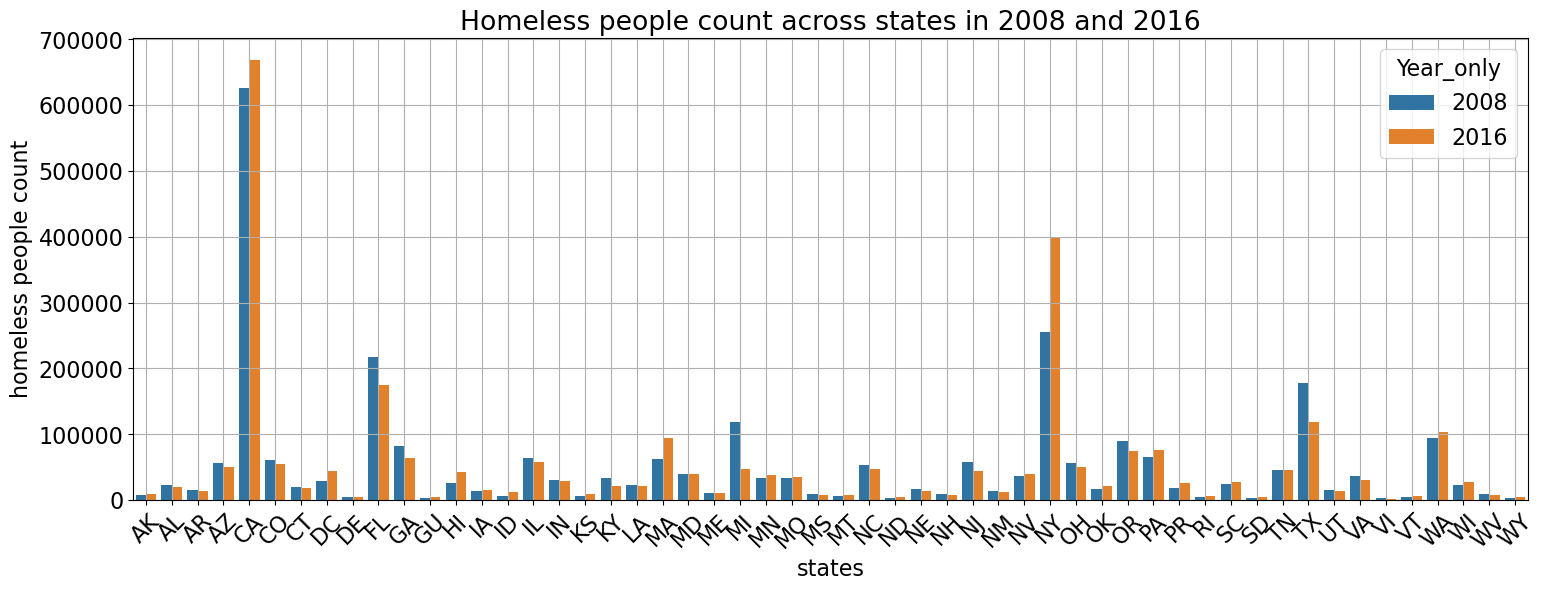

<Figure size 640x480 with 0 Axes>

In [83]:
# plot the number of homeless people per state
plt.figure(figsize=(18,6))
sns.barplot(y='homeless_count', x='state_abbrev', hue="Year_only", data=final_dataframe)
plt.ylabel('homeless people count')
plt.xlabel("states")
plt.xticks(rotation = 45)
plt.title('Homeless people count across states in 2008 and 2016')
plt.grid()
plt.show()

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

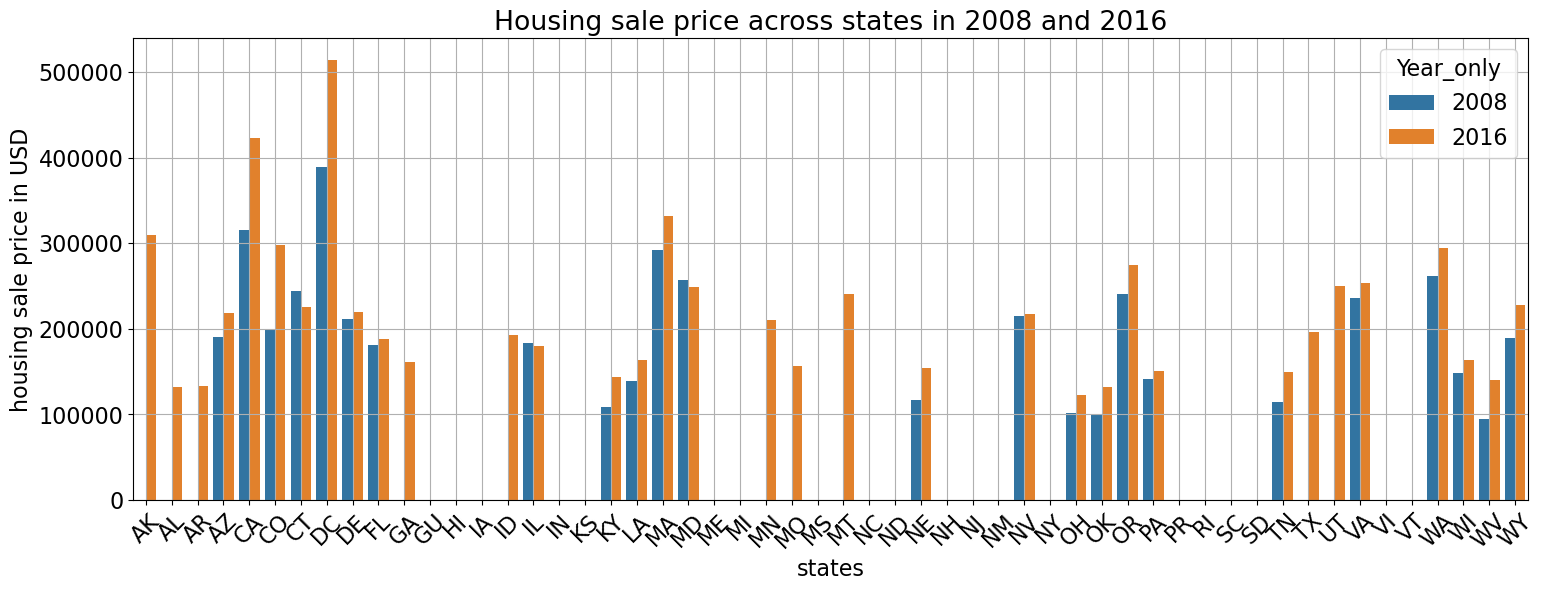

In [85]:
# plot the number of homeless people per state
plt.figure(figsize=(18,6))
sns.barplot(y='Sale_Prices', x='state_abbrev', hue="Year_only", data=final_dataframe)
plt.ylabel('housing sale price in USD')
plt.xlabel("states")
plt.xticks(rotation = 45)
plt.title('Housing sale price across states in 2008 and 2016')
plt.grid()
plt.show()

/var/folders/24/6z460d797_g0w77wl1mc7jqr0000gn/T/ipykernel_39913/3220382500.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(final_dataframe.corr(), vmin=-1, vmax=1, annot=True)
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not f

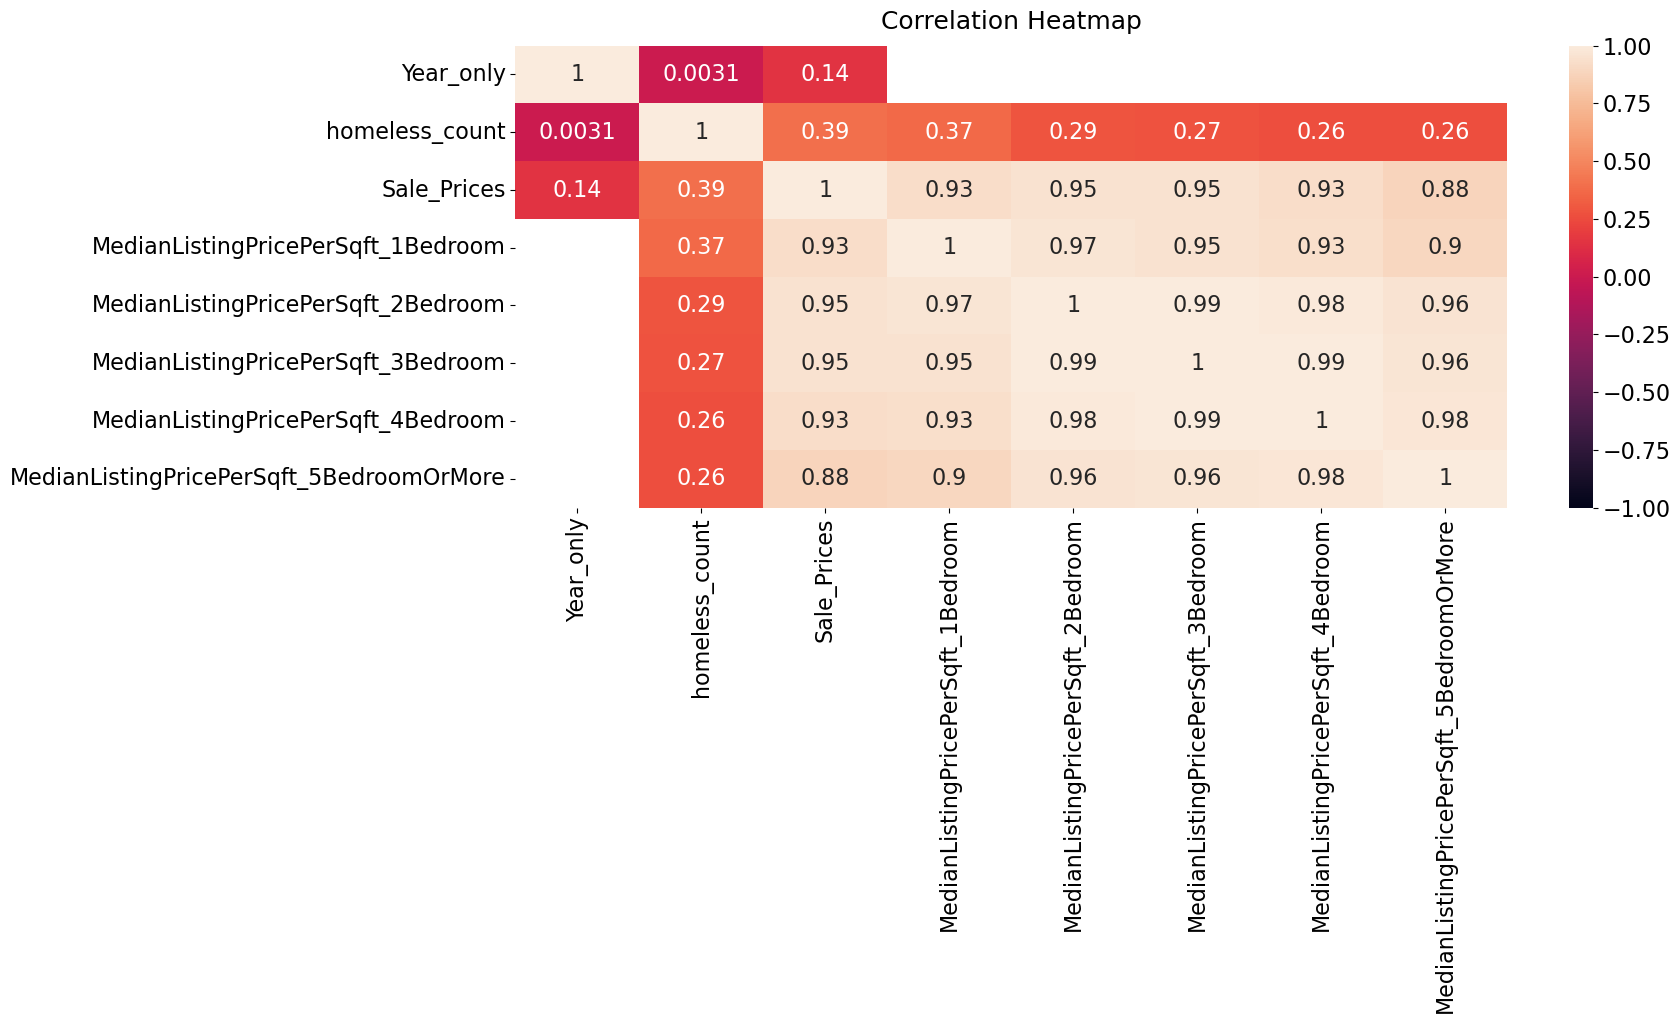

In [87]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(final_dataframe.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);